In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install openpyxl
import seaborn as sns

In [2]:
df= pd.read_excel('Monthly_Expenses.xlsx')

In [5]:
df

,Timestamp,Amount spent by,For,Mode of transaction,Home Expenses,Further details if any,Amount
0,2022-01-30 21:10:13.829,LKS,Home,Online/Digital,Entertainment / Movie,TV Malai visit expenses,1045
1,2022-01-30 21:10:56.490,LKS,Home,Online/Digital,Car wash,Dec,800
2,2022-01-30 21:16:48.227,LKS,Home,Online/Digital,Fruits and Vegitables,NaN,150
3,2022-01-30 21:17:27.680,LKS,Home,Online/Digital,Fruits and Vegitables,Mango point,1288
4,2022-01-30 21:18:02.831,LKS,Home,Online/Digital,General Provisions,NaN,300
...,...,...,...,...,...,...,...
295,2022-05-31 16:35:36.133,LKS,Home,Cash,Snacks and eatables,juice,30
296,2022-05-31 16:36:47.416,LKS,Home,Cash,"stationeries and photos of mka, lks and maa",NaN,250
297,2022-05-31 16:37:37.164,LKS,Home,Online/Digital,Fruits and Vegitables,NaN,1252
298,2022-05-31 16:38:16.156,LKS,Home,Online/Digital,General Provisions,backiyam stores,4382


In [6]:
df.describe()

,Amount
count,300.000000
mean,1707.873333
std,4821.002771
min,20.000000
25%,160.000000
50%,400.000000
75%,1000.000000
max,49400.000000


In [7]:
df.dtypes

Timestamp                 datetime64[ns]
Amount spent by                   object
For                               object
Mode of transaction               object
Home Expenses                     object
Further details if any            object
Amount                             int64
dtype: object

In [11]:
df.columns=['Date-Time','Spent_by','Spent_For','Mode_of_Pay','Spent_Category','Further_Details','Amount']

In [9]:
df.Spent_For.unique()

array(['Home', 'Personal', 'Card payments', 'Peace Paradice', 'Others',
       'Peace Paradice exp', 'others', 'Other'], dtype=object)

In [10]:
df.Spent_by.unique()

array(['LKS', 'KIV', 'MKA', 'MAS', 'MAA'], dtype=object)

In [11]:
df.Spent_Category.count()

300

In [12]:
#no null vlues in amount column
df['Amount'].isnull().values.any()

False

In [13]:
#no null vlues in Spent_For column
df['Spent_For'].isnull().values.any()

False

In [14]:
df['Spent_For'] = df['Spent_For'].replace(['Card Payments'],'Card')
df['Spent_For'] = df['Spent_For'].replace(['Peace Paradice','Peace Paradice exp'],'Peace_P')
df['Spent_For'] = df['Spent_For'].replace(['Other','others'],'Others')

In [15]:
x=df['Spent_For']
y=df['Amount']

Text(0, 0.5, 'Amount in Rupees')

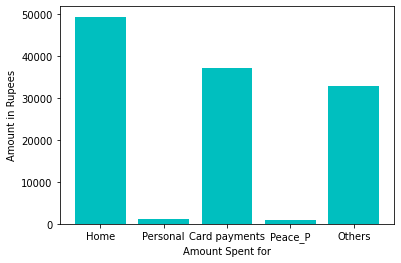

In [16]:
plt.bar(x,y,color = 'c')
plt.xlabel('Amount Spent for')
plt.ylabel('Amount in Rupees')

In [12]:
df['Spent_Category'].value_counts()

Fruits and Vegitables                                    46
Snacks and eatables                                      33
General Provisions                                       28
Repair works                                             20
Medical                                                  18
Flower                                                   14
Dress / Tailoring                                        12
Gift                                                     11
Travel                                                   10
Fuel                                                      9
Milk                                                      8
Ironing                                                   8
Servant salary                                            7
Coffeepowder                                              7
Water                                                     5
Entertainment / Movie                                     5
New Purchase                            

In [25]:
df['Spent_Category'] = df['Spent_Category'].replace(['Parlour','Kitchen stands and scissor','HDFC card','Helmet for srikumar','Vehicle insurance'                                         ,'sahaj bhavan valuation report for sbi loan processing'    ,'Photo print','laptop plug adapter'                                      
,'Internet charges'                                         
,'car driving class of Srikumar'                            
,'table cover'                                               
,'to srikumar '                                              
,'goorka, kuppai etc'                                       
,'Table delivery and fixing'                                
,'Goorka and kuppai'                                         
,'AC instalation'                                           
,'AC fitting'                                               
,'ac delivery charges'                                      
,'two wheeler air check'                                    
,'Temple'                                                  
,'college form'  
,'Internet recharga'
,'amazon purchases - woffle maker and other accessories'    
,'stationeries and photos of mka, lks and maa','to srikumar'],'Others')

In [29]:
df['Spent_Category'].value_counts()

Fruits and Vegitables    46
Snacks and eatables      33
General Provisions       28
Others                   26
Repair works             20
Medical                  18
Flower                   14
Dress / Tailoring        12
Gift                     11
Travel                   10
Fuel                      9
Milk                      8
Ironing                   8
Coffeepowder              7
Servant salary            7
New Purchase              5
Entertainment / Movie     5
Water                     5
Stationery                4
Donation                  4
cat Food                  4
TV Rechanrge              3
Gas                       3
Rice mill                 3
Magazines                 2
Car wash                  1
EB                        1
Garden exp                1
Mobile Recharge           1
medical                   1
Name: Spent_Category, dtype: int64

Text(0, 0.5, 'Amount in Rupees')

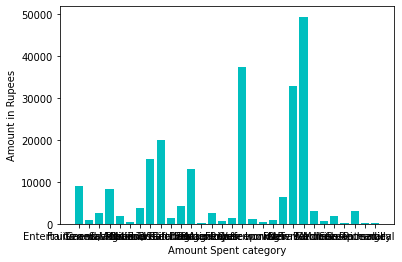

In [30]:
x=df['Spent_Category']
y=df['Amount']
plt.bar(x,y,color = 'c')
plt.xlabel('Amount Spent category')
plt.ylabel('Amount in Rupees')

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaling=MinMaxScaler()

In [38]:
label_encoder = preprocessing.LabelEncoder()
df['Spent_Category']= label_encoder.fit_transform(df['Spent_Category'])

In [40]:
df['Spent_Category'].unique()

array([ 5,  0,  7, 11, 16, 28, 23,  3, 12, 25,  4,  2, 24, 14,  6, 27, 20,
        1, 13,  8, 19, 26, 18, 15,  9, 10, 17, 22, 21, 29])

Text(0, 0.5, 'Amount in Rupees')

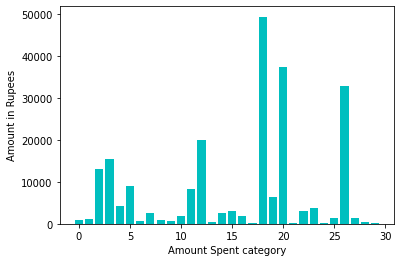

In [42]:
x=df['Spent_Category']
y=df['Amount']
plt.bar(x,y,color = 'c')
plt.xlabel('Amount Spent category')
plt.ylabel('Amount in Rupees')

In [44]:
normalized_df=scaling.fit_transform(df[['Spent_Category','Amount']])

In [47]:
normalized_df=pd.DataFrame(normalized_df)
normalized_df.columns=['Spent_Category','Amount']
normalized_df

,Spent_Category,Amount
0,0.172414,0.020757
1,0.000000,0.015796
2,0.241379,0.002633
3,0.241379,0.025678
4,0.379310,0.005670
...,...,...
295,0.793103,0.000203
296,0.655172,0.004658
297,0.241379,0.024949
298,0.379310,0.088335
